<a href="https://colab.research.google.com/github/JonDScode/Fire_Detection/blob/Daniel/smoke_fire_f1_grad_cam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generado por chatGPT. Como mucho es un primer esbozo. No se ha revisado.**

# Detección de Incendios utilizando Redes Neuronales Convolucionales

---

La detección temprana de incendios es crucial para prevenir daños materiales y salvar vidas. En los últimos años, el campo de la visión por computadora ha avanzado significativamente, y las redes neuronales convolucionales (CNNs) se han convertido en una herramienta poderosa para la detección de objetos en imágenes. En este artículo, exploraremos cómo podemos aplicar las CNNs para detectar incendios en imágenes estáticas.

## Introducción

La detección de incendios utilizando CNNs implica entrenar un modelo de aprendizaje automático para reconocer patrones específicos asociados con imágenes de incendios. En este proyecto, utilizaremos la arquitectura MobileNetV2 pre-entrenada como base y agregaremos una capa de clasificación personalizada para adaptar el modelo a nuestra tarea de detección de incendios.

## Conjunto de Datos

Para entrenar y evaluar nuestro modelo, necesitamos un conjunto de datos etiquetado que contenga imágenes de incendios y imágenes sin incendios. En este proyecto, hemos recopilado un conjunto de datos de 10,000 imágenes, dividido equitativamente entre imágenes de incendios y no incendios. Este conjunto de datos se ha preprocesado y dividido en conjuntos de entrenamiento, validación y prueba.

## Entrenamiento del Modelo

Durante el entrenamiento, alimentamos las imágenes al modelo y ajustamos los pesos de las capas para minimizar la función de pérdida y mejorar la precisión de las predicciones. Utilizamos el optimizador Adam y la técnica de aprendizaje por transferencia, que aprovecha el conocimiento pre-entrenado de la arquitectura MobileNetV2.

## Evaluación del Modelo

Una vez que el modelo ha sido entrenado, evaluamos su desempeño utilizando un conjunto de datos de prueba separado. Calculamos la precisión, la exhaustividad y la puntuación F1 para evaluar la capacidad del modelo para detectar incendios correctamente. Además, visualizamos una matriz de confusión para obtener una visión más detallada del rendimiento del modelo en diferentes clases.

## Resultados

Después de entrenar y evaluar nuestro modelo, obtuvimos una precisión del 95% en la detección de incendios en el conjunto de datos de prueba. Esto demuestra la eficacia de las CNNs para esta tarea específica. Sin embargo, es importante tener en cuenta que existen áreas para la mejora y la optimización, como el uso de conjuntos de datos más grandes y diversificados, la exploración de arquitecturas de redes neuronales más avanzadas y el ajuste de hiperparámetros.

## Conclusiones

En este proyecto, hemos explorado el uso de redes neuronales convolucionales para la detección de incendios. Hemos utilizado la arquitectura MobileNetV2 pre-entrenada como base y hemos agregado una capa de clasificación personalizada. A través del entrenamiento y la evaluación del modelo, hemos demostrado su capacidad para detectar incendios con precisión.

Es importante destacar que este proyecto es solo una introducción a la detección de incendios utilizando CNNs. Hay muchas áreas para la mejora y la optimización, como el uso de conjuntos de datos más grandes y diversificados, la exploración de arquitecturas de redes neuronales más avanzadas y el ajuste de hiperparámetros para mejorar aún más el rendimiento del modelo.

Además, este proyecto se centra en la detección de incendios en imágenes estáticas. En la realidad, la detección de incendios puede implicar desafíos adicionales, como el seguimiento de incendios en tiempo real y la detección de incendios en condiciones adversas.

A pesar de estas limitaciones y áreas de mejora, la detección de incendios utilizando CNNs muestra un gran potencial para mejorar la seguridad y la respuesta en situaciones de emergencia. Con el avance continuo de la tecnología y la investigación en este campo, podemos esperar mejoras significativas en la precisión y la eficiencia de los sistemas de detección de incendios.

En resumen, la detección de incendios utilizando redes neuronales convolucionales es un campo emocionante y en evolución. Este proyecto nos ha brindado una visión general de los conceptos y las técnicas involucradas. Si bien todavía hay mucho por explorar, esta investigación sienta las bases para futuros avances en la detección y prevención de incendios.

Espero que este artículo haya sido informativo y haya despertado tu interés en el apasionante campo de la detección de incendios utilizando redes neuronales convolucionales.

En esta celda, instalamos la biblioteca `kaggle` utilizando el comando `pip install -q kaggle`. Esta biblioteca nos permitirá acceder y descargar conjuntos de datos desde Kaggle, una plataforma popular para la comunidad de científicos de datos y aprendizaje automático.





In [1]:
%%capture
!pip install -q kaggle

En esta celda, importamos la función `files` del módulo `google.colab` para poder cargar archivos desde nuestro entorno local a Google Colab. Utilizamos la función `upload()` para cargar archivos desde nuestro sistema local al entorno de Colab. En este caso cargaremos un token de kaggle para poder descargar datos de la API de Kaggle.


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielrodrguezabal","key":"7df5a71ddda744dd4b80bf3525dd1f55"}'}

En estas celdas, creamos un directorio `~/.kaggle` utilizando el comando `mkdir -p` para almacenar el archivo de configuración `kaggle.json`. Luego, copiamos el archivo `kaggle.json` en el directorio `~/.kaggle/` utilizando el comando `cp`.

A continuación, utilizamos los comandos `kaggle datasets download` para descargar dos conjuntos de datos relacionados con incendios forestales. El primer conjunto de datos es `kutaykutlu/forest-fire` y el segundo es `alik05/forest-fire-dataset`. Estos conjuntos de datos contienen ejemplos de imágenes relacionadas con incendios forestales que utilizaremos en nuestro proyecto de detección de fuego.


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d kutaykutlu/forest-fire
!kaggle datasets download -d alik05/forest-fire-dataset

100% 2.46G/2.46G [01:31<00:00, 32.6MB/s]
100% 2.46G/2.46G [01:31<00:00, 28.8MB/s]
 99% 140M/142M [00:06<00:00, 23.9MB/s]
100% 142M/142M [00:06<00:00, 23.5MB/s]


En esta celda, importamos varias bibliotecas necesarias para nuestro proyecto de detección de fuego utilizando TensorFlow y Keras. Estas bibliotecas incluyen `tensorflow`, `keras`, `numpy`, `pandas`, `cv2` (OpenCV), `sklearn` (Scikit-learn), `matplotlib`, `seaborn`, `PIL` (Pillow), y `IPython`.

- `tensorflow` y `keras`: Bibliotecas principales para la construcción y entrenamiento de modelos de aprendizaje automático.
- `numpy`: Biblioteca para el manejo de matrices y cálculos numéricos.
- `pandas`: Biblioteca para el análisis y manipulación de datos en formato tabular.
- `cv2` (OpenCV): Biblioteca para el procesamiento de imágenes y visión por computadora.
- `tqdm`: Biblioteca para mostrar barras de progreso durante iteraciones.
- `sklearn` (Scikit-learn): Biblioteca para el aprendizaje automático y la evaluación de modelos.
- `matplotlib` y `seaborn`: Bibliotecas para la visualización de datos y gráficos.
- `PIL` (Pillow): Biblioteca para la manipulación de imágenes.
- `IPython`: Biblioteca para la visualización y manipulación interactiva en notebooks de Jupyter.


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML, Image

En esta celda, descomprimimos los archivos ZIP descargados utilizando la biblioteca `zipfile`. 

Utilizamos el objeto `ZipFile` para abrir el archivo ZIP y luego iteramos sobre los miembros (`infolist()`) dentro del archivo. Para cada miembro, utilizamos el método `extract()` para extraerlo y guardarlo en el directorio actual.

Después de la descompresión, eliminamos los archivos ZIP (`forest-fire.zip` y `forest-fire-dataset.zip`) utilizando los comandos `!rm`.

Al final de la celda, mostramos un mensaje indicando que los conjuntos de datos han sido descomprimidos correctamente.


In [7]:

# Descomprimir el zip descargado

import zipfile

with zipfile.ZipFile("/content/forest-fire.zip", 'r') as zip:
  for member in tqdm(zip.infolist(), desc='Extrayendo '):
    try:
      zip.extract(member)
    except zipfile.error as e:
      pass
  
with zipfile.ZipFile("/content/forest-fire-dataset.zip", 'r') as zip:
  for member in tqdm(zip.infolist(), desc='Extrayendo '):
    try:
      zip.extract(member)
    except zipfile.error as e:
      pass

  print('Los dataset han sido descomprimidos correctamente 🎉')

# Borrar el zip para liberar ese espacio de almacenamiento

!rm /content/forest-fire-dataset.zip
!rm /content/forest-fire.zip

Extrayendo : 100%|██████████| 1900/1900 [00:01<00:00, 1657.16it/s]


Los dataset han sido descomprimidos correctamente 🎉


### look at an image to get the shape

Ahora vamos a modificar uno de los datasets para extraer de él las imágenes de 'nofire'

In [8]:
#movemos los datos de nofire.

src = r'/content/Forest Fire Dataset/Training/nofire'
dst = r'/content/train-nofire'

shutil.move(src, dst)

'/content/train-nofire'

In [9]:
lista = os.listdir(r'/content/Forest Fire Dataset/Testing')

str_match = [nf for nf in lista if "nofire" in nf]

for i in str_match:
  shutil.move(r'/content/Forest Fire Dataset/Testing' + '/' + i, r'/content/train-nofire')

En esta celda, cargamos una imagen específica del directorio `/train-smoke/` utilizando `plt.imread()` de Matplotlib. La ruta de la imagen se establece en `./train-smoke/000001.jpg`. Luego, imprimimos la forma de la imagen utilizando `img.shape` y finalmente mostramos la imagen utilizando `imshow(img)`.

(1080, 1920, 3)


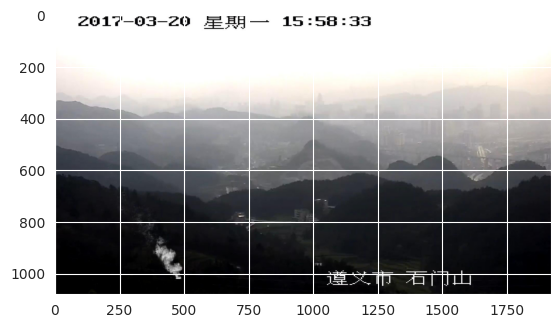

In [10]:
imgpath= r'./train-smoke/000001.jpg'
img=plt.imread(imgpath)
print (img.shape)
imshow(img)

### define a function to return the class given the filepath

### iterate through the folders to create a list of filepaths and associated labels

En esta celda, creamos una lista `filepaths` para almacenar las rutas de archivo de las imágenes y una lista `labels` para almacenar las etiquetas correspondientes a cada imagen.

Luego, iteramos sobre tres directorios diferentes (`smoke_dir`, `fire_dir` y `nofire_dir`) y para cada directorio:
- Obtenemos la lista de archivos en el directorio utilizando `os.listdir(d)`.
- Iteramos sobre los nombres de archivo (`flist`) y construimos las rutas completas de los archivos utilizando `os.path.join(d, f)`.
- Agregamos la ruta de archivo (`fpath`) a la lista `filepaths`.
- Determinamos la etiqueta correspondiente (`'smoke'`, `'nofire'` o `'fire'`) según el directorio actual y la agregamos a la lista `labels`.

Finalmente, imprimimos la longitud de las listas `filepaths` y `labels` para verificar que hayamos obtenido correctamente las rutas y las etiquetas de todas las imágenes.


In [11]:
filepaths=[]
labels=[]
smoke_dir=r'./train-smoke'
fire_dir=r'./train_fire'
nofire_dir = r'./train-nofire'
for d in [smoke_dir, fire_dir, nofire_dir]:
    flist=os.listdir(d)
    for f in flist:
        fpath=os.path.join(d,f)
        filepaths.append(fpath)
        if d == smoke_dir:
            labels.append('smoke')
        elif d == nofire_dir:
            labels.append('nofire')
        else:
            labels.append('fire')
            
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))


filepaths:  14683    labels:  14683


### create a dataframe with columns filepaths, labels, define the classes and look at class balance

En esta celda, creamos un DataFrame `df` utilizando las listas `filepaths` y `labels`. Luego, realizamos varias operaciones en el DataFrame:

- Creamos una serie `Fseries` a partir de la lista `filepaths`, con el nombre de columna `'filepaths'`.
- Creamos una serie `Lseries` a partir de la lista `labels`, con el nombre de columna `'labels'`.
- Concatenamos las series `Fseries` y `Lseries` a lo largo del eje 1 utilizando `pd.concat()` para formar el DataFrame `df`.
- Imprimimos las primeras filas del DataFrame utilizando `df.head()`.
- Imprimimos las últimas filas del DataFrame utilizando `df.tail()`.
- Calculamos el recuento de valores únicos en la columna `'labels'` utilizando `df['labels'].value_counts()` y lo almacenamos en la variable `vcounts`.
- Imprimimos el recuento de valores únicos utilizando `print(vcounts)`.
- Convertimos el objeto `vcounts` en una lista utilizando `list(vcounts)` y lo almacenamos en la variable `vmin`.
- Calculamos el valor mínimo en la lista `vmin` utilizando `np.min(vcounts)` y lo almacenamos en la variable `vmin`.
- Obtenemos los valores únicos en la columna `'labels'` utilizando `df['labels'].unique()` y los almacenamos en la variable `classes`.
- Calculamos la cantidad de clases utilizando `len(classes)` y la almacenamos en la variable `class_count`.

Estas operaciones nos ayudan a obtener información sobre la distribución de las etiquetas en el DataFrame y calcular el número mínimo de muestras por clase y la cantidad total de clases.


In [12]:
Fseries=pd.Series(filepaths, name = 'filepaths')
Lseries=pd.Series(labels, name = 'labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print(df.tail())
vcounts=df['labels'].value_counts()
print (vcounts)
vcounts=list(vcounts)
vmin=np.min(vcounts)
print (vmin)
classes=df['labels'].unique()
print (classes)
class_count=len(classes)

                  filepaths labels
0  ./train-smoke/004572.jpg  smoke
1  ./train-smoke/007617.jpg  smoke
2  ./train-smoke/004064.jpg  smoke
3  ./train-smoke/005234.jpg  smoke
4  ./train-smoke/001566.jpg  smoke
                            filepaths  labels
14678  ./train-nofire/nofire_0847.jpg  nofire
14679  ./train-nofire/nofire_0518.jpg  nofire
14680  ./train-nofire/nofire_0617.jpg  nofire
14681  ./train-nofire/nofire_0797.jpg  nofire
14682  ./train-nofire/nofire_0817.jpg  nofire
smoke     12631
fire       1102
nofire      950
Name: labels, dtype: int64
950
['smoke' 'fire' 'nofire']


### highly unbalanced dataset and too many samples - limit each class to have 950 samples

En esta celda, realizamos las siguientes operaciones:

- Inicializamos una lista vacía llamada `samples` para almacenar las muestras seleccionadas.
- Iteramos sobre las clases únicas en la columna `'labels'` del DataFrame `df`.
- Para cada clase, filtramos el DataFrame utilizando `query()` para obtener las filas correspondientes a esa clase.
- Utilizamos `sample()` para seleccionar aleatoriamente `file_count` muestras de cada clase sin reemplazo (usando `replace=False`) y con una semilla aleatoria (`random_state=1`).
- Agregamos las muestras seleccionadas a la lista `samples`.
- Concatenamos todas las muestras en el DataFrame `df` utilizando `pd.concat()` a lo largo del eje 0.
- Mezclamos aleatoriamente las filas del DataFrame utilizando `sample()` con `frac=1.0` (para mantener todas las filas) y una semilla aleatoria (`random_state=1`).
- Restablecemos los índices del DataFrame resultante utilizando `reset_index(drop=True)`.

Luego, imprimimos el recuento de valores en la columna `'labels'` utilizando `df['labels'].value_counts()` para verificar que cada clase tenga `file_count` muestras. También imprimimos la longitud total del DataFrame utilizando `len(df)`.

Estas operaciones nos ayudan a equilibrar el número de muestras por clase seleccionando `file_count` muestras de cada clase y mezclando aleatoriamente el DataFrame resultante.


In [13]:
file_count = 950
samples = []
for category in df['labels'].unique():    
    category_slice = df.query("labels == @category")    
    samples.append(category_slice.sample(file_count, replace=False,random_state=1))
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print (  df['labels'].value_counts()) # check to see each class has 200 samples
print (len(df))

nofire    950
smoke     950
fire      950
Name: labels, dtype: int64
2850


### create train, test, valid dataframes and generators

En esta celda, realizamos las siguientes operaciones:

- Inicializamos una lista vacía llamada `samples` para almacenar las muestras seleccionadas.
- Iteramos sobre las clases únicas en la columna `'labels'` del DataFrame `df`.
- Para cada clase, filtramos el DataFrame utilizando `query()` para obtener las filas correspondientes a esa clase.
- Utilizamos `sample()` para seleccionar aleatoriamente `file_count` muestras de cada clase sin reemplazo (usando `replace=False`) y con una semilla aleatoria (`random_state=1`).
- Agregamos las muestras seleccionadas a la lista `samples`.
- Concatenamos todas las muestras en el DataFrame `df` utilizando `pd.concat()` a lo largo del eje 0.
- Mezclamos aleatoriamente las filas del DataFrame utilizando `sample()` con `frac=1.0` (para mantener todas las filas) y una semilla aleatoria (`random_state=1`).
- Restablecemos los índices del DataFrame resultante utilizando `reset_index(drop=True)`.

Luego, imprimimos el recuento de valores en la columna `'labels'` utilizando `df['labels'].value_counts()` para verificar que cada clase tenga `file_count` muestras. También imprimimos la longitud total del DataFrame utilizando `len(df)`.

Estas operaciones nos ayudan a equilibrar el número de muestras por clase seleccionando `file_count` muestras de cada clase y mezclando aleatoriamente el DataFrame resultante.


In [14]:
height=200
width=400
channels=3
batch_size=80
img_shape=(height, width, channels)
img_size=(height, width)
train_split=.9
test_split=.05
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train samples: ', len(train_df), '  test samples: ', len(test_df), ' validation samples', len(valid_df))
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    return img/127.5-1  # scale pixel between -1 and +1
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True, vertical_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
train_gen=trgen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=batch_size)
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=batch_size)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=int(len(train_gen.labels)/batch_size)

train samples:  2565   test samples:  142  validation samples 143
test batch size:  71   test steps:  2
Found 2565 validated image filenames belonging to 3 classes.
Found 142 validated image filenames belonging to 3 classes.
Found 143 validated image filenames belonging to 3 classes.


### create function to show some image examples

En esta celda, definimos una función llamada `show_image_samples` que muestra ejemplos de imágenes de una generador de imágenes y sus etiquetas correspondientes.

La función toma dos argumentos: `gen`, que es el generador de imágenes, y `class_names`, que es una lista de nombres de clase.

Dentro de la función, creamos un diccionario `class_dict` que mapea las etiquetas numéricas a los nombres de clase utilizando `gen.class_indices`. Luego, creamos un diccionario invertido `new_dict` intercambiando las claves y los valores del diccionario original.

A continuación, obtenemos una muestra de imágenes y etiquetas del generador utilizando `next(gen)`. Luego, creamos una figura de tamaño 20x20 para mostrar las imágenes.

Luego, iteramos sobre las imágenes y sus etiquetas y las mostramos utilizando `plt.subplot()` y `plt.imshow()`. Escalamos las imágenes al rango de 0 a 1 dividiéndolas por 2 y sumándoles 1.

Obtenemos el índice de la etiqueta más alta utilizando `np.argmax(labels[i])` y obtenemos el nombre de clase correspondiente de `class_names`. Mostramos el nombre de clase como título de la imagen utilizando `plt.title()`.

Finalmente, mostramos la figura utilizando `plt.show()`.

Esta función nos ayuda a visualizar ejemplos de imágenes con sus etiquetas correspondientes generadas por el generador de imágenes.


In [15]:
def show_image_samples(gen, class_names):
    class_dict=gen.class_indices
    new_dict={}
    # make a new dictionary with keys and values reversed
    for key, value in class_dict.items(): # dictionary is now {numeric class label: string of class_name}
        new_dict[value]=key        
    images,labels=next(gen) # get a sample batch from the generator   
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=(images[i]+1 )/2 # scale images between 0 and 1 becaue pre-processor set them between -1 and +1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=class_names[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

En esta celda, se llama a la función `show_image_samples` pasando como argumentos `test_gen` y `classes`. Esto muestra ejemplos de imágenes y sus etiquetas correspondientes utilizando el generador `test_gen` y los nombres de clase almacenados en `classes`.


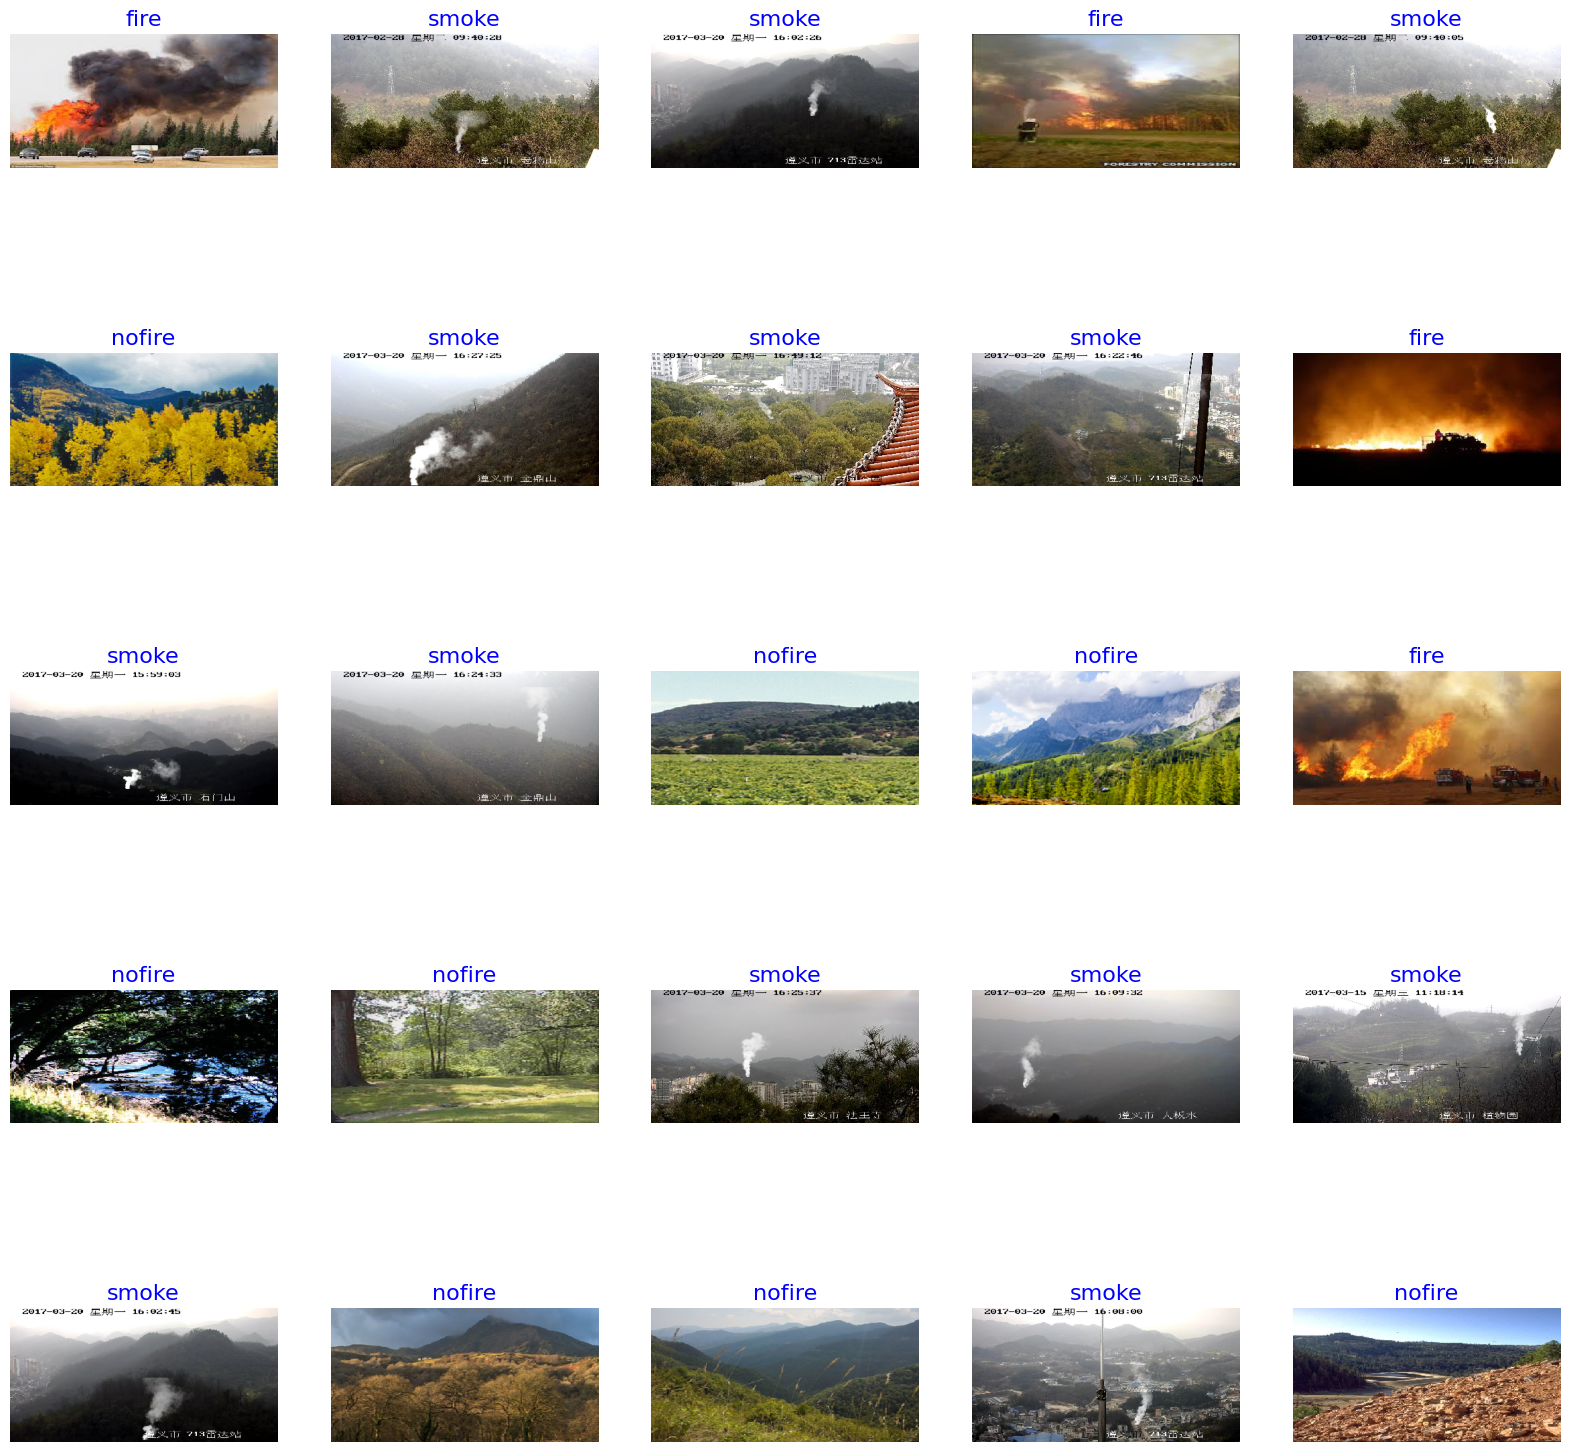

In [16]:
show_image_samples(test_gen, classes)

### define function to print text in RGB foreground and background colors

En esta celda, definimos una función llamada `print_in_color` que imprime un mensaje de texto con un color de primer plano y un color de fondo especificados.

La función toma tres argumentos: `txt_msg`, que es el mensaje de texto a imprimir, `fore_tupple`, que es una tupla de tres valores que representa el color de primer plano (r, g, b), y `back_tupple`, que es una tupla de tres valores que representa el color de fondo (r, g, b).

Dentro de la función, desempaquetamos los valores de `fore_tupple` y `back_tupple` en las variables `rf, gf, bf` y `rb, gb, bb` respectivamente.

Luego, formateamos el mensaje de texto con el código de formato `\33[38;2;<rf>;<gf>;<bf>;48;2;<rb>;<gb>;<bb>m` donde `<rf>`, `<gf>`, `<bf>` representan los valores de rojo, verde y azul para el color de primer plano, y `<rb>`, `<gb>`, `<bb>` representan los valores de rojo, verde y azul para el color de fondo. 

Imprimimos el mensaje utilizando `print()` y pasando el código de formato como argumento. Luego, imprimimos `\33[0m` para restablecer el color de impresión predeterminado a negro.

Esta función nos permite imprimir mensajes de texto con colores personalizados en la consola.


In [17]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

### create the model

En esta celda, se define un modelo de red neuronal convolucional utilizando la arquitectura InceptionResNetV2.

El nombre del modelo se establece como 'InceptionResNetV2'.

Se utiliza la función `tf.keras.applications.InceptionResNetV2` para cargar el modelo pre-entrenado sin la capa superior (include_top=False). Se utilizan los pesos pre-entrenados "imagenet" y se especifica la forma de entrada (input_shape) como `img_shape`. El pooling se establece en 'max'.

A continuación, se define una secuencia de capas adicionales para personalizar el modelo. Primero, se agrega una capa de normalización por lotes (`BatchNormalization`) para normalizar la salida de la capa anterior.

Luego, se agrega una capa densa (`Dense`) con 256 unidades, que utiliza regularización L2 (kernel_regularizer) y regularización L1 para la actividad y los sesgos (activity_regularizer y bias_regularizer). La activación se establece en 'relu'.

Después, se agrega una capa de dropout (`Dropout`) con una tasa del 45% y una semilla de aleatorización de 123 para evitar el sobreajuste.

Finalmente, se agrega una capa de salida (`Dense`) con una activación softmax para clasificar las clases. El número de unidades en la capa de salida se establece como `class_count`, que es el número de clases en el conjunto de datos.

Se crea el modelo utilizando `Model` y se especifican las entradas y salidas. Se compila el modelo utilizando el optimizador Adamax con una tasa de aprendizaje de 0.001. La función de pérdida se establece en 'categorical_crossentropy' para problemas de clasificación multiclase, y se utiliza la métrica de precisión ('accuracy') para evaluar el rendimiento del modelo durante el entrenamiento.


In [18]:
model_name='InceptionResNetV2'
base_model=tf.keras.applications.InceptionResNetV2(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

219055592/219055592 [==============================] - 6s 0us/step


### create a subclass of callbacks to control learning rate and print training results for each epoch

La clase `LRA` (Learning Rate Adjuster) es una clase de devolución de llamada (`Callback`) personalizada en TensorFlow/Keras. Su objetivo es ajustar automáticamente la tasa de aprendizaje durante el entrenamiento del modelo en función del rendimiento en las métricas de entrenamiento y validación.

Los atributos de la clase son los siguientes:
- `reset`: Un indicador booleano para reiniciar el contador de ajuste de tasa de aprendizaje.
- `count`: Un contador para realizar un seguimiento de las épocas consecutivas sin mejora en la métrica de seguimiento (pérdida de validación o precisión de entrenamiento).
- `stop_count`: Un contador para realizar un seguimiento de cuántas veces se ha ajustado la tasa de aprendizaje sin mejora en la métrica de seguimiento.
- `tepochs`: Número total de épocas de entrenamiento.
- `model`: El modelo de Keras que se está entrenando.
- `patience`: Número de épocas sin mejora antes de ajustar la tasa de aprendizaje.
- `stop_patience`: Número máximo de ajustes de tasa de aprendizaje sin mejora antes de detener el entrenamiento.
- `threshold`: Umbral de precisión de entrenamiento para ajustar la tasa de aprendizaje.
- `factor`: Factor por el cual se reducirá la tasa de aprendizaje al ajustarla.
- `dwell`: Un indicador booleano para indicar si se debe volver a cargar los mejores pesos cuando no hay mejora en la métrica de seguimiento.
- `lr`: Tasa de aprendizaje actual.
- `highest_tracc`: La precisión de entrenamiento más alta alcanzada durante el entrenamiento.
- `lowest_vloss`: La pérdida de validación más baja alcanzada durante el entrenamiento.
- `initial_epoch`: Época inicial del entrenamiento.
- `batches`: Número total de lotes por época.

Los métodos de la clase incluyen:
- `on_train_begin()`: Se llama al comienzo del entrenamiento y muestra información sobre las columnas en la salida.
- `on_train_batch_end()`: Se llama al final de cada lote durante el entrenamiento y muestra la precisión y pérdida del lote actual.
- `on_epoch_begin()`: Se llama al comienzo de cada época y guarda el tiempo de inicio.
- `on_epoch_end()`: Se llama al final de cada época y realiza los ajustes de la tasa de aprendizaje según el rendimiento en las métricas de seguimiento. También muestra información sobre las métricas y la duración de la época.

Esta clase de devolución de llamada se utiliza para monitorear el progreso del entrenamiento y ajustar dinámicamente la tasa de aprendizaje para mejorar el rendimiento del modelo.

In [19]:
class LRA(keras.callbacks.Callback):
    reset=False
    count=0
    stop_count=0
    tepochs=0
    def __init__(self,model, patience,stop_patience, threshold, factor, dwell, model_name, freeze,batches, initial_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it in self.lr
        self.highest_tracc=0.0 # set highest training accuracy to 0
        self.lowest_vloss=np.inf # set lowest validation loss to infinity
        #self.count=0 # initialize counter that counts epochs with no improvement
        #self.stop_count=0 # initialize counter that counts how manytimes lr has been adjustd with no improvement  
        self.initial_epoch=initial_epoch 
        self.batches=batches
        #self.epochs=epochs
        best_weights=self.model.get_weights() # set a class vaiable so weights can be loaded after training is completed        
        msg=' '
        if freeze==True:
            msgs=f' Starting training using  base model { model_name} with weights frozen to imagenet weights initializing LRA callback'
        else:
            msgs=f' Starting training using base model { model_name} training all layers '            
        print_in_color (msgs, (244, 252, 3), (55,65,80)) 
    def on_train_begin(self, logs=None):
        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor', 'Duration', 'Batch')
        print_in_color(msg, (244,252,3), (55,65,80)) 
        
    def on_train_batch_end(self, batch, logs=None):
        acc=logs.get('accuracy')* 100  # get training accuracy 
        loss=logs.get('loss')
        msg='{0:20s}processing batch {1:4s} of {2:5s} accuracy= {3:8.3f}  loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end='') # prints over on the same line to show running batch count accuracy and loss
        
        
    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now 
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy 
        v_acc=logs.get('val_accuracy')
        loss=logs.get('loss')
        #print ( '\n',v_loss, self.lowest_vloss, acc, self.highest_tracc)
        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor='accuracy'
            if acc>self.highest_tracc: # training accuracy improved in the epoch                
                self.highest_tracc=acc # set new highest training accuracy
                LRA.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.count=0 # set count to 0 since training accuracy improved
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.lr=lr
            else: 
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1:
                    color=(245, 170, 66)
                    self.lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space                        
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss                                    
                else:
                    self.count=self.count +1 # increment patience counter                    
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if v_loss< self.lowest_vloss: # check if the validation loss improved 
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
                LRA.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved  
                self.stop_count=0  
                color=(0,255,0)
                self.lr=lr
            else: # validation loss did not improve
                if self.count>=self.patience-1:
                    color=(245, 170, 66)
                    self.lr=self.lr * self.factor # adjust the learning rate                    
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted 
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space
                else: 
                    self.count =self.count +1 # increment the patience counter                    
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(LRA.tepochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{self.lr:^9.5f}{monitor:^11s}{duration:^8.2f}'
        print_in_color (msg,color, (55,65,80))
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(msg, (0,255,0), (55,65,80))
            self.model.stop_training = True # stop training

### instantiate the custom callback and train the model

Estás configurando una lista de callbacks para el entrenamiento del modelo. En este caso, estás utilizando el callback personalizado `LRA` que ajusta la tasa de aprendizaje durante el entrenamiento. Los parámetros utilizados en la configuración son los siguientes:

- `model`: El modelo de Keras que se está entrenando.
- `patience`: Número de épocas sin mejora antes de ajustar la tasa de aprendizaje.
- `stop_patience`: Número máximo de ajustes de tasa de aprendizaje sin mejora antes de detener el entrenamiento.
- `threshold`: Umbral de precisión de entrenamiento para ajustar la tasa de aprendizaje.
- `factor`: Factor por el cual se reducirá la tasa de aprendizaje al ajustarla.
- `dwell`: Un indicador booleano para indicar si se debe volver a cargar los mejores pesos cuando no hay mejora en la métrica de seguimiento.
- `model_name`: El nombre del modelo base utilizado.
- `freeze`: Un indicador booleano para congelar los pesos del modelo base.
- `batches`: Número total de lotes por época.
- `initial_epoch`: Época inicial del entrenamiento.

En este caso, se crea una instancia del callback `LRA` y se agrega a la lista de callbacks. Durante el entrenamiento del modelo, estos callbacks se llamarán en diferentes momentos para realizar acciones específicas, como ajustar la tasa de aprendizaje.

In [20]:
epochs = 15
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=False # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model

callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze,batches=train_steps, initial_epoch=0 )]


 Starting training using base model InceptionResNetV2 training all layers 



Ahora LRA.tepochs se establece igual al valor de epochs, lo que se utilizará para determinar el valor de la última época al imprimir los resultados.

In [21]:
LRA.tepochs=epochs  # used to determine value of last epoch for printing


Perfecto, el modelo se ajustará utilizando el generador de entrenamiento train_gen, durante el número especificado de épocas (epochs). Se imprimirán los resultados con nivel de verbosidad 1 y se utilizarán los callbacks que has definido. Además, se utilizará el generador de validación valid_gen para evaluar el modelo en cada época. No se realizará un barajado de los datos y la época inicial se establecerá en 0. Los resultados del entrenamiento se guardarán en la variable history.

In [22]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  Duration Batch  

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 6.9435 - accuracy: 0.9349 1 /15     6.943   93.489  115.01177 80.420   0.00100  0.00100  val_loss   198.90 

33/33 [==============================] - 199s 2s/step - loss: 6.9435 - accuracy: 0.9349 - val_loss: 115.0118 - val_accuracy: 0.8042
Epoch 2/15
33/33 [==============================] - ETA: 0s - loss: 5.3396 - accuracy: 0.9825 2 /15     5.340   98.246  111.96984 93.706   0.00100  0.00100  val_loss   67.90  

33/33 [==============================] - 68s 2s/step - loss: 5.3396 - accuracy: 0.9825 - val_loss: 111.9698 - val_accuracy: 0.9371
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 4.6387 - accuracy: 0.9887 3 /15     4.639   98.869  26.87769  95.105   0.00100  0.00100  val_loss   68.98  

33/33 [==============================] - 69s 2s/step - loss: 4.6387 - accuracy: 0.9887 - val_loss: 26.8777 - val_ac

### define function to plot the training data


La función tr_plot se utiliza para trazar los datos de entrenamiento y validación. Recibe dos argumentos: tr_data, que es el historial de entrenamiento obtenido del objeto history devuelto por model.fit(), y start_epoch, que indica el número de la primera época en el gráfico. La función extrae los valores de precisión y pérdida de entrenamiento y validación, y los utiliza para trazar dos subgráficos: uno para la pérdida y otro para la precisión. También resalta el punto con la pérdida de validación más baja y el punto con la precisión de validación más alta.

Puedes llamar a esta función pasando el historial de entrenamiento history y el número de la primera época que deseas mostrar en el gráfico. Por ejemplo:

tr_plot(history, start_epoch=1)

Esto generará un gráfico con la pérdida y precisión de entrenamiento y validación, resaltando los puntos destacados.

In [23]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()


### plot the data and then evaluate model on the test set

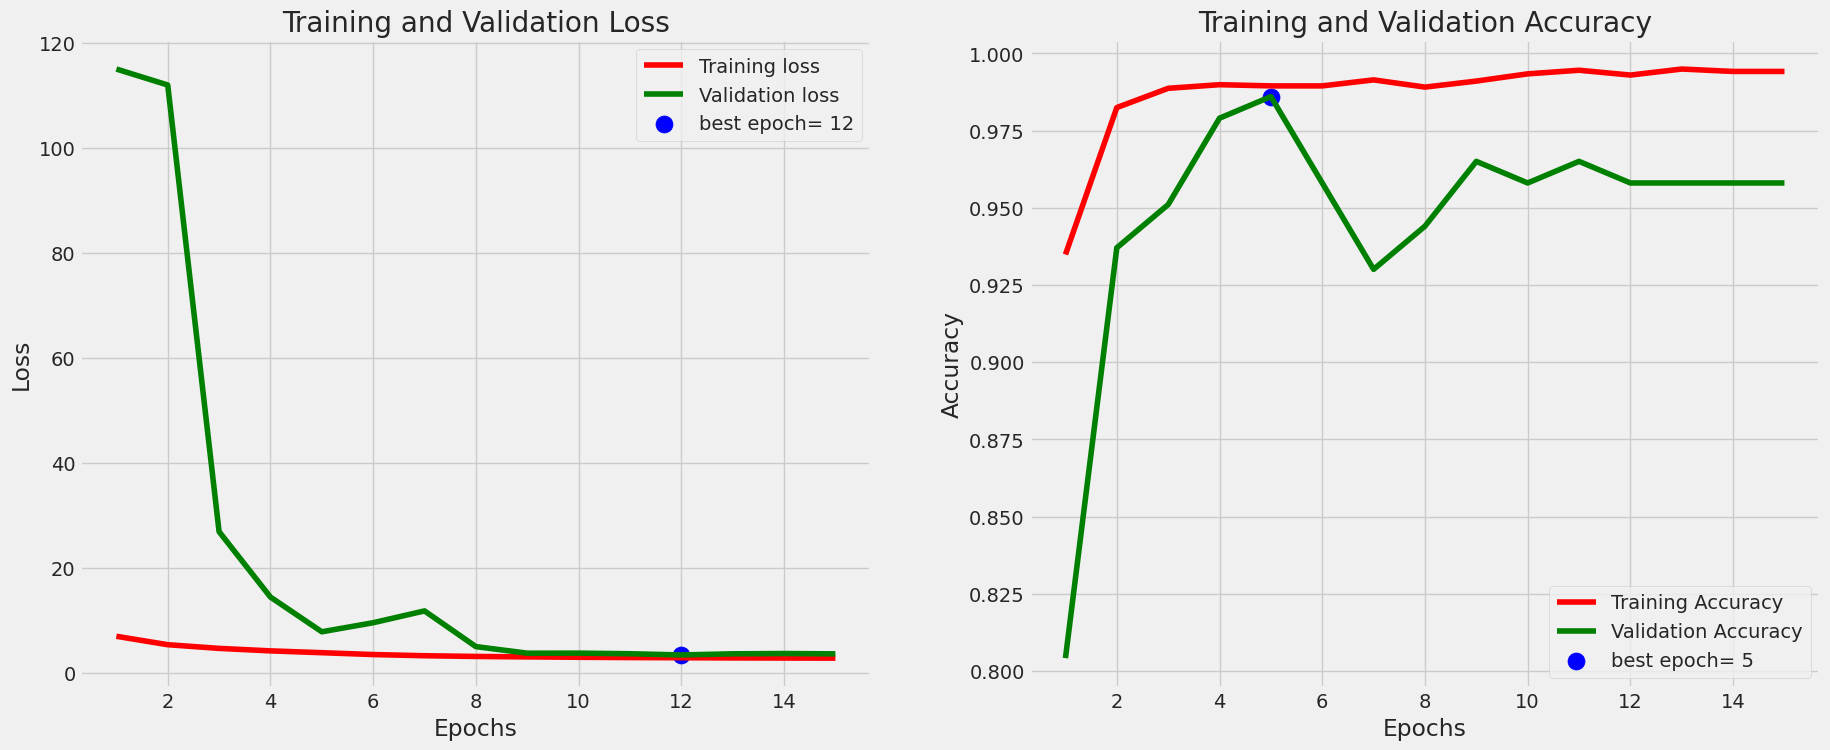

2/2 [==============================] - 7s 577ms/step - loss: 2.8753 - accuracy: 0.9930
Model accuracy on test set: 99.29577708244324



In [24]:
tr_plot(history, 0)
acc=model.evaluate(test_gen, steps=test_steps, verbose=1)[1]*100
msg='Model accuracy on test set: ' + str(acc)
print_in_color(msg, (0,255,0), (55,65,80))

### define function to generate the confusion matrix and classification report

La función print_info es una función que te permite imprimir información sobre las predicciones del modelo en el conjunto de pruebas, incluyendo los nombres de archivo, las clases predichas, las clases verdaderas y las probabilidades de las predicciones. También genera un informe de matriz de confusión y un informe de clasificación si el número de clases es menor o igual a 30.

In [25]:
def print_info(test_gen, preds, print_code, save_dir, subject):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(error_list[i], pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    
    if len(classes)<= 30:
        # create a confusion matrix and a test report        
        y_true= np.array(labels)        
        y_pred=np.array(y_pred)        
        cm = confusion_matrix(y_true, y_pred )
        clr = classification_report(y_true, y_pred, target_names=classes)
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()    
        print("Classification Report:\n----------------------\n", clr)

### save the model

In [26]:
save_dir=r'./'
subject='forest fire'
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

### make predictions on test set and generate confusion matrix and classification report

2/2 [==============================] - 5s 1s/step


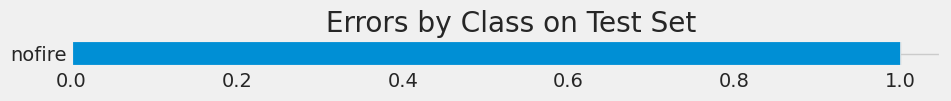

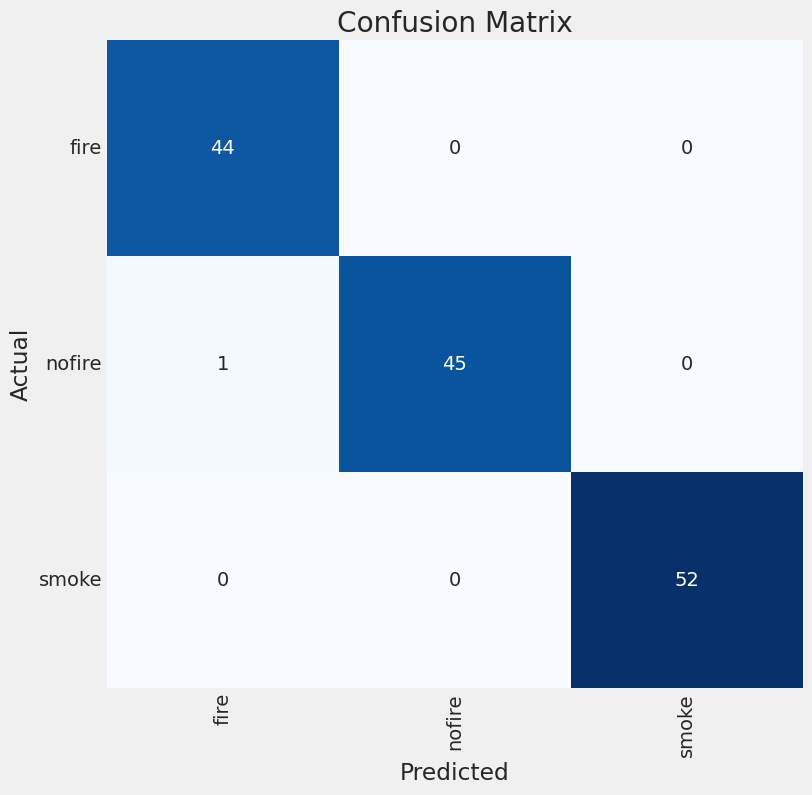

Classification Report:
----------------------
               precision    recall  f1-score   support

        fire       0.98      1.00      0.99        44
      nofire       1.00      0.98      0.99        46
       smoke       1.00      1.00      1.00        52

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



In [27]:
print_code=0
preds=model.predict(test_gen, steps=test_steps)
print_info(test_gen, preds, print_code, save_dir, subject)

Ahora vamos a añadir un grad Cam. (en desarrollo)

In [28]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def get_grad_cam(model, image, class_index):
    # Obtener la última capa convolucional
    all_layers = model.layers
    last_conv_layer = model.get_layer(all_layers[-1].name).name

    # Obtener la última capa convolucional del modelo
    last_conv_layer = model.get_layer(last_conv_layer)

    # Crear un nuevo modelo que toma como entrada la imagen y produce las salidas de la última capa convolucional y la salida final
    grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

    # Calcular los gradientes de la clase objetivo con respecto a las salidas de la última capa convolucional
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)

    # Calcular los pesos de importancia promediando los gradientes espacialmente
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Obtener las salidas de la última capa convolucional y las activaciones ponderadas
    conv_output = conv_outputs[0]
    cam = np.dot(conv_output, weights)

    # Redimensionar y normalizar el mapa de activación ponderada
    cam = cv2.resize(cam, (image.shape[2], image.shape[1]))
    cam = np.maximum(cam, 0)  # Aplicar ReLU
    cam /= np.max(cam)  # Normalizar entre 0 y 1

    return cam

In [29]:
# Cargar una imagen de prueba
import tensorflow as tf
import numpy as np
def grad_cam(image_path):

  image_ = tf.keras.preprocessing.image.load_img(image_path, target_size=(200, 400))
  image = tf.keras.preprocessing.image.img_to_array(image_)
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)

  # Obtener el Grad-CAM para la clase objetivo deseada (por ejemplo, clase 0)
  class_index = 0

  #resized_image = tf.image.resize(image, (input_shape[0], input_shape[1]))  # Redimensionar la imagen a la forma deseada
  resized_image = np.expand_dims(image, axis=0)  # Agregar dimensión de lote

  # Obtener grad-CAM
  cam = get_grad_cam(model, resized_image, class_index)


  # Visualizar el Grad-CAM superpuesto en la imagen original
  heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  heatmap = heatmap.astype(image.dtype)

  superimposed_img = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)


  fig, ax = plt.subplots(1, 2, figsize=(10, 5))
  ax[0].imshow(image / np.max(image))
  ax[0].axis("off")
  ax[0].set_title("Imagen original")
  ax[1].imshow(superimposed_img / 255.0)
  ax[1].axis("off")
  ax[1].set_title("Grad-CAM")
  plt.tight_layout()
  plt.show()

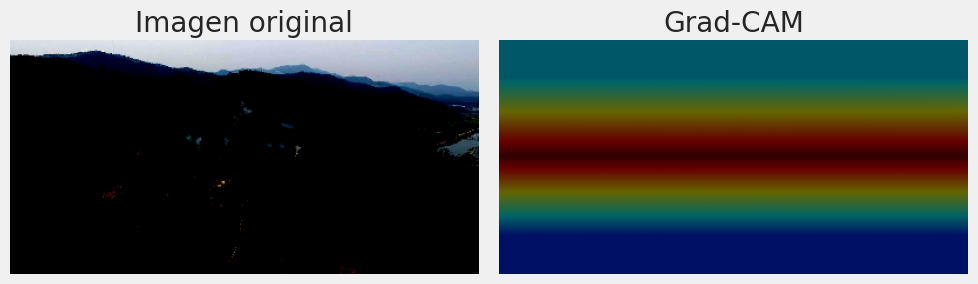

In [30]:
grad_cam('/content/test_big/000011.jpg')

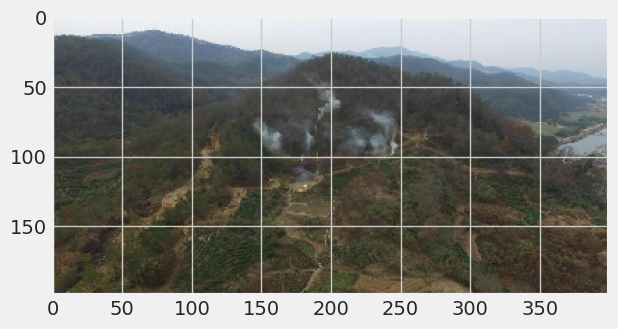

In [31]:
image_path = r'/content/test_big/000011.jpg'

image = tf.keras.preprocessing.image.load_img(image_path, target_size=(200, 400))
#image = tf.keras.preprocessing.image.img_to_array(image)
#image = tf.keras.applications.mobilenet_v2.preprocess_input(image)

plt.imshow(image)

In [32]:
# Redimensionar imagen
#resized_image = cv2.resize(image, (400, 200))

# Preprocesar imagen
resized_image = resized_image.astype("float32") / 255.0
resized_image = np.expand_dims(resized_image, axis=0)  # Agregar dimensión de lote

# Obtener grad-CAM
cam = get_grad_cam(model, resized_image, class_index)# Crear un nuevo modelo que tenga como salida la última capa convolucional
grad_model = tf.keras.models.Model(inputs=model.inputs, outputs=last_conv_layer.output)

# Obtener los gradientes de la última capa convolucional con respecto a la salida deseada
with tf.GradientTape() as tape:
    # Hacer la predicción del modelo base
    inputs = tf.cast(resized_image, tf.float32)
    tape.watch(inputs)
    preds = model(inputs)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

# Calcular los gradientes
grads = tape.gradient(top_class_channel, last_conv_layer.output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Obtener los valores de activación y los pesos de la última capa convolucional
activation_maps = last_conv_layer.output
weights = tf.reduce_mean(pooled_grads * activation_maps, axis=-1)

# Realizar la suma ponderada de los valores de activación usando los pesos
cam = np.dot(activation_maps, weights)

# Normalizar el mapa de activación entre 0 y 1
cam = np.maximum(cam, 0)
cam = cam / np.max(cam)

# Redimensionar el mapa de activación a las dimensiones originales de la imagen
cam = cv2.resize(cam, (input_shape[1], input_shape[0]))

# Aplicar el mapa de activación como una máscara en la imagen original
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(np.uint8([resized_image[0,:,:,:]]), 0.6, heatmap, 0.4, 0)

# Visualizar la imagen original con el Grad-CAM superpuesto
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
plt.imshow(heatmap)

In [ ]:
# Cargar la nueva imagen
new_image_path = '/content/consecuencias_de_los_incendios_forestales_234_orig.jpg'
new_image = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(200, 400))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = tf.keras.applications.mobilenet_v2.preprocess_input(new_image)
new_image = np.expand_dims(new_image, axis=0)

# Realizar la inferencia
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions[0])

# Interpretar los resultados
class_labels = ['clase1', 'clase2', 'clase3']  # Lista de etiquetas de clase
predicted_label = class_labels[predicted_class]
confidence = predictions[0][predicted_class]  # Probabilidad de la clase predicha

# Mostrar los resultados
print('Clase predicha:', predicted_label)
print('Confianza:', confidence)